In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm

from optim.functions.player_gain_expected_value import player_gain_expected_value, player_gain_expected_value_numpy
from optim.functions.player_gain_variance import player_gain_variance, player_gain_variance_numpy
from optim.functions.player_utility_kelly_criteria import player_utility_kelly_criteria
from optim.functions.player_utility_linear import player_utility_linear
from optim.functions.player_utility_sharp_ratio import player_utility_sharp_ratio
from optim.functions.player_expected_utility import player_expected_utility
from optim.functions.player_expected_utility_exp_ce import player_expected_utility_exp_ce
from optim.functions.player_expected_utility_log import player_expected_utility_log

from optim.resolve.resolve_fik import resolve_fik
from optim.resolve.simulate_prob import simulate_prob

# Paramètres de la simulation
M = 10  # Nombre de matchs
N = 3   # Nombre de résultats possibles par match (ex: victoire, nul, défaite)
T = 40 # Nombre de pas
H = 30 # Nombre de simulations
B = 1 # Bankroll initiale

BIAS_BOOKMAKER = 0.05  # Biais de la distribution des probabilités du bookmaker
BIAS_PLAYER = 0.01      # Biais de la distribution des probabilités du joueur
STD_BOOKMAKER = 0.1  # Ecart-type de la distribution des cotes du bookmaker
STD_PLAYER = 0.05      # Ecart-type de la distribution des cotes du joueur
MARGIN_BOOKMAKER = 0.1  # Marge du bookmaker
MIN_PROB = 0.05  # Probabilité minimale d'un résultat
MAX_PROB = 0.95  # Probabilité maximale d'un résultat

np.set_printoptions(precision=2, suppress=True)

In [20]:
r, o, t = simulate_prob(M, N, BIAS_BOOKMAKER, BIAS_PLAYER, STD_BOOKMAKER, STD_PLAYER, MARGIN_BOOKMAKER, MIN_PROB, MAX_PROB)
x = [np.random.choice(N, p=r[i]) for i in range(M)]
f_log_ = 1/2 * resolve_fik(o, t, lambda  f, o, t : - player_expected_utility(f, o, t, B, np.log))
g_ = sum(f_log_[k, i] * (o[k, i] * (x[k] == i) - 1)  for k in range(M) for i in range(N))
print(f"Kelly criteria log: \n{f_log_}, \ngain: {g_}\n")


Kelly criteria log: 
[[0.01 0.04 0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.04]
 [0.03 0.   0.04]
 [0.   0.   0.  ]
 [0.   0.   0.03]
 [0.   0.   0.  ]
 [0.   0.09 0.03]
 [0.01 0.   0.1 ]], 
gain: -0.08370328478796057



In [12]:
r, o, t = simulate_prob(M, N, BIAS_BOOKMAKER, BIAS_PLAYER, STD_BOOKMAKER, STD_PLAYER, MARGIN_BOOKMAKER, MIN_PROB, MAX_PROB)
x = [np.random.choice(N, p=r[i]) for i in range(M)]

# Kelly criteria
B = 1
f_kelly_old = 1/2 * resolve_fik(o, t, lambda  f, o, t : player_utility_kelly_criteria(f, o, t, B=B))
g = sum(f_kelly_old[k, i] * (o[k, i] * (x[k] == i) - 1)  for k in range(M) for i in range(N))
print(f"Analytic sol Kelly criteria: \n{f_kelly_old}, \ngain: {g}\n")

# f_log_new = 1/2 * resolve_fik(o, t, lambda  f, o, t : - player_expected_utility_log(f, o, t, B=B))
# g_new = sum(f_log_new[k, i] * (o[k, i] * (x[k] == i) - 1)  for k in range(M) for i in range(N))
# print(f"Kelly criteria: \n{f_log_new}, \ngain: {g_new}\n")

f_log_new_tc = 1/2 * resolve_fik(o, t, lambda  f, o, t : - player_expected_utility_log(f, o, t, B=B), method='trust-constr')
g_new_tc = sum(f_log_new_tc[k, i] * (o[k, i] * (x[k] == i) - 1)  for k in range(M) for i in range(N))
print(f"Kelly criteria tc: \n{f_log_new_tc}, \ngain: {g_new_tc}\n")

# f_log_ = 1/2 * resolve_fik(o, t, lambda  f, o, t : - player_expected_utility(f, o, t, B, np.log))
# g_ = sum(f_log_[k, i] * (o[k, i] * (x[k] == i) - 1)  for k in range(M) for i in range(N))
# print(f"Kelly criteria log: \n{f_log_}, \ngain: {g_}\n")

f_exp_ce = 1/2 * resolve_fik(o, t, lambda  f, o, t : - player_expected_utility_exp_ce(f, o, t, B=B))
g_exp_ce = sum(f_exp_ce[k, i] * (o[k, i] * (x[k] == i) - 1)  for k in range(M) for i in range(N))
print(f"Expected utility exp ce: \n{f_exp_ce}, \ngain: {g_exp_ce}\n")



Analytic sol Kelly criteria: 
[[0.13 0.24 0.  ]
 [0.02 0.   0.  ]
 [0.01 0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.01 0.   0.  ]
 [0.02 0.   0.  ]
 [0.03 0.   0.  ]
 [0.04 0.   0.  ]], 
gain: -0.24655301709778787

Kelly criteria tc: 
[[ 0.01  0.04 -0.  ]
 [ 0.06 -0.    0.03]
 [ 0.02 -0.    0.02]
 [ 0.02  0.02 -0.  ]
 [ 0.02 -0.    0.01]
 [-0.   -0.    0.02]
 [ 0.02  0.02 -0.  ]
 [ 0.03 -0.    0.02]
 [ 0.02  0.01 -0.  ]
 [ 0.07 -0.    0.03]], 
gain: 0.08997099696923352

Expected utility exp ce: 
[[0.1  0.21 0.  ]
 [0.04 0.   0.  ]
 [0.01 0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.01 0.   0.  ]
 [0.03 0.   0.  ]
 [0.03 0.   0.  ]
 [0.06 0.   0.  ]], 
gain: -0.13194925361377535



Simulation:   0%|          | 0/30 [00:00<?, ?it/s]c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


Simulation 0/30, step 0/50
Simulation 0/30, step 1/50
Simulation 0/30, step 2/50


c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\scipy\optimize\_differentiable_functions.py:231: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


Simulation 0/30, step 3/50
Simulation 0/30, step 4/50
Simulation 0/30, step 5/50
Simulation 0/30, step 6/50
Simulation 0/30, step 7/50
Simulation 0/30, step 8/50
Simulation 0/30, step 9/50
Simulation 0/30, step 10/50
Simulation 0/30, step 11/50
Simulation 0/30, step 12/50
Simulation 0/30, step 13/50
Simulation 0/30, step 14/50
Simulation 0/30, step 15/50
Simulation 0/30, step 16/50
Simulation 0/30, step 17/50
Simulation 0/30, step 18/50
Simulation 0/30, step 19/50
Simulation 0/30, step 20/50
Simulation 0/30, step 21/50
Simulation 0/30, step 22/50
Simulation 0/30, step 23/50
Simulation 0/30, step 24/50
Simulation 0/30, step 25/50
Simulation 0/30, step 26/50
Simulation 0/30, step 27/50
Simulation 0/30, step 28/50
Simulation 0/30, step 29/50
Simulation 0/30, step 30/50
Simulation 0/30, step 31/50
Simulation 0/30, step 32/50
Simulation 0/30, step 33/50
Simulation 0/30, step 34/50
Simulation 0/30, step 35/50
Simulation 0/30, step 36/50
Simulation 0/30, step 37/50
Simulation 0/30, step 38/50

Simulation:   3%|▎         | 1/30 [03:09<1:31:41, 189.71s/it]

Simulation 1/30, step 0/50
Simulation 1/30, step 1/50
Simulation 1/30, step 2/50
Simulation 1/30, step 3/50
Simulation 1/30, step 4/50
Simulation 1/30, step 5/50
Simulation 1/30, step 6/50
Simulation 1/30, step 7/50
Simulation 1/30, step 8/50
Simulation 1/30, step 9/50
Simulation 1/30, step 10/50
Simulation 1/30, step 11/50
Simulation 1/30, step 12/50
Simulation 1/30, step 13/50
Simulation 1/30, step 14/50
Simulation 1/30, step 15/50
Simulation 1/30, step 16/50
Simulation 1/30, step 17/50
Simulation 1/30, step 18/50
Simulation 1/30, step 19/50
Simulation 1/30, step 20/50
Simulation 1/30, step 21/50
Simulation 1/30, step 22/50
Simulation 1/30, step 23/50
Simulation 1/30, step 24/50
Simulation 1/30, step 25/50
Simulation 1/30, step 26/50
Simulation 1/30, step 27/50
Simulation 1/30, step 28/50
Simulation 1/30, step 29/50
Simulation 1/30, step 30/50
Simulation 1/30, step 31/50
Simulation 1/30, step 32/50
Simulation 1/30, step 33/50
Simulation 1/30, step 34/50
Simulation 1/30, step 35/50
Si

Simulation:   7%|▋         | 2/30 [05:14<1:10:50, 151.80s/it]

Simulation 2/30, step 0/50
Simulation 2/30, step 1/50
Simulation 2/30, step 2/50
Simulation 2/30, step 3/50
Simulation 2/30, step 4/50
Simulation 2/30, step 5/50
Simulation 2/30, step 6/50
Simulation 2/30, step 7/50
Simulation 2/30, step 8/50
Simulation 2/30, step 9/50
Simulation 2/30, step 10/50
Simulation 2/30, step 11/50
Simulation 2/30, step 12/50
Simulation 2/30, step 13/50
Simulation 2/30, step 14/50
Simulation 2/30, step 15/50
Simulation 2/30, step 16/50
Simulation 2/30, step 17/50
Simulation 2/30, step 18/50
Simulation 2/30, step 19/50
Simulation 2/30, step 20/50
Simulation 2/30, step 21/50
Simulation 2/30, step 22/50
Simulation 2/30, step 23/50
Simulation 2/30, step 24/50
Simulation 2/30, step 25/50
Simulation 2/30, step 26/50
Simulation 2/30, step 27/50
Simulation 2/30, step 28/50
Simulation 2/30, step 29/50
Simulation 2/30, step 30/50
Simulation 2/30, step 31/50
Simulation 2/30, step 32/50
Simulation 2/30, step 33/50
Simulation 2/30, step 34/50
Simulation 2/30, step 35/50
Si

Simulation:  10%|█         | 3/30 [08:42<1:19:51, 177.45s/it]

Simulation 3/30, step 0/50
Simulation 3/30, step 1/50
Simulation 3/30, step 2/50
Simulation 3/30, step 3/50
Simulation 3/30, step 4/50
Simulation 3/30, step 5/50
Simulation 3/30, step 6/50
Simulation 3/30, step 7/50
Simulation 3/30, step 8/50
Simulation 3/30, step 9/50
Simulation 3/30, step 10/50
Simulation 3/30, step 11/50
Simulation 3/30, step 12/50
Simulation 3/30, step 13/50
Simulation 3/30, step 14/50
Simulation 3/30, step 15/50
Simulation 3/30, step 16/50
Simulation 3/30, step 17/50
Simulation 3/30, step 18/50
Simulation 3/30, step 19/50
Simulation 3/30, step 20/50
Simulation 3/30, step 21/50
Simulation 3/30, step 22/50
Simulation 3/30, step 23/50
Simulation 3/30, step 24/50
Simulation 3/30, step 25/50
Simulation 3/30, step 26/50
Simulation 3/30, step 27/50
Simulation 3/30, step 28/50
Simulation 3/30, step 29/50
Simulation 3/30, step 30/50
Simulation 3/30, step 31/50
Simulation 3/30, step 32/50
Simulation 3/30, step 33/50
Simulation 3/30, step 34/50
Simulation 3/30, step 35/50
Si

Simulation:  13%|█▎        | 4/30 [11:28<1:14:55, 172.89s/it]

Simulation 4/30, step 0/50
Simulation 4/30, step 1/50
Simulation 4/30, step 2/50
Simulation 4/30, step 3/50
Simulation 4/30, step 4/50
Simulation 4/30, step 5/50
Simulation 4/30, step 6/50
Simulation 4/30, step 7/50
Simulation 4/30, step 8/50
Simulation 4/30, step 9/50
Simulation 4/30, step 10/50
Simulation 4/30, step 11/50
Simulation 4/30, step 12/50
Simulation 4/30, step 13/50
Simulation 4/30, step 14/50
Simulation 4/30, step 15/50
Simulation 4/30, step 16/50
Simulation 4/30, step 17/50
Simulation 4/30, step 18/50
Simulation 4/30, step 19/50
Simulation 4/30, step 20/50
Simulation 4/30, step 21/50
Simulation 4/30, step 22/50
Simulation 4/30, step 23/50
Simulation 4/30, step 24/50
Simulation 4/30, step 25/50
Simulation 4/30, step 26/50
Simulation 4/30, step 27/50
Simulation 4/30, step 28/50
Simulation 4/30, step 29/50
Simulation 4/30, step 30/50
Simulation 4/30, step 31/50
Simulation 4/30, step 32/50
Simulation 4/30, step 33/50
Simulation 4/30, step 34/50
Simulation 4/30, step 35/50
Si

Simulation:  17%|█▋        | 5/30 [13:28<1:04:04, 153.78s/it]

Simulation 5/30, step 0/50
Simulation 5/30, step 1/50
Simulation 5/30, step 2/50
Simulation 5/30, step 3/50
Simulation 5/30, step 4/50
Simulation 5/30, step 5/50
Simulation 5/30, step 6/50
Simulation 5/30, step 7/50
Simulation 5/30, step 8/50
Simulation 5/30, step 9/50
Simulation 5/30, step 10/50
Simulation 5/30, step 11/50
Simulation 5/30, step 12/50
Simulation 5/30, step 13/50
Simulation 5/30, step 14/50
Simulation 5/30, step 15/50
Simulation 5/30, step 16/50
Simulation 5/30, step 17/50
Simulation 5/30, step 18/50
Simulation 5/30, step 19/50
Simulation 5/30, step 20/50
Simulation 5/30, step 21/50
Simulation 5/30, step 22/50
Simulation 5/30, step 23/50
Simulation 5/30, step 24/50
Simulation 5/30, step 25/50
Simulation 5/30, step 26/50
Simulation 5/30, step 27/50
Simulation 5/30, step 28/50
Simulation 5/30, step 29/50
Simulation 5/30, step 30/50
Simulation 5/30, step 31/50
Simulation 5/30, step 32/50
Simulation 5/30, step 33/50
Simulation 5/30, step 34/50
Simulation 5/30, step 35/50
Si

Simulation:  20%|██        | 6/30 [15:25<56:32, 141.34s/it]  

Simulation 6/30, step 0/50
Simulation 6/30, step 1/50
Simulation 6/30, step 2/50
Simulation 6/30, step 3/50
Simulation 6/30, step 4/50
Simulation 6/30, step 5/50
Simulation 6/30, step 6/50
Simulation 6/30, step 7/50
Simulation 6/30, step 8/50
Simulation 6/30, step 9/50
Simulation 6/30, step 10/50
Simulation 6/30, step 11/50
Simulation 6/30, step 12/50
Simulation 6/30, step 13/50
Simulation 6/30, step 14/50
Simulation 6/30, step 15/50
Simulation 6/30, step 16/50
Simulation 6/30, step 17/50
Simulation 6/30, step 18/50
Simulation 6/30, step 19/50
Simulation 6/30, step 20/50
Simulation 6/30, step 21/50
Simulation 6/30, step 22/50
Simulation 6/30, step 23/50
Simulation 6/30, step 24/50
Simulation 6/30, step 25/50
Simulation 6/30, step 26/50
Simulation 6/30, step 27/50
Simulation 6/30, step 28/50
Simulation 6/30, step 29/50
Simulation 6/30, step 30/50
Simulation 6/30, step 31/50
Simulation 6/30, step 32/50
Simulation 6/30, step 33/50
Simulation 6/30, step 34/50
Simulation 6/30, step 35/50
Si

Simulation:  23%|██▎       | 7/30 [17:15<50:10, 130.88s/it]

Simulation 7/30, step 0/50
Simulation 7/30, step 1/50
Simulation 7/30, step 2/50
Simulation 7/30, step 3/50
Simulation 7/30, step 4/50
Simulation 7/30, step 5/50
Simulation 7/30, step 6/50
Simulation 7/30, step 7/50
Simulation 7/30, step 8/50
Simulation 7/30, step 9/50
Simulation 7/30, step 10/50
Simulation 7/30, step 11/50
Simulation 7/30, step 12/50
Simulation 7/30, step 13/50
Simulation 7/30, step 14/50
Simulation 7/30, step 15/50
Simulation 7/30, step 16/50
Simulation 7/30, step 17/50
Simulation 7/30, step 18/50
Simulation 7/30, step 19/50
Simulation 7/30, step 20/50
Simulation 7/30, step 21/50
Simulation 7/30, step 22/50
Simulation 7/30, step 23/50
Simulation 7/30, step 24/50
Simulation 7/30, step 25/50
Simulation 7/30, step 26/50
Simulation 7/30, step 27/50
Simulation 7/30, step 28/50
Simulation 7/30, step 29/50
Simulation 7/30, step 30/50
Simulation 7/30, step 31/50
Simulation 7/30, step 32/50
Simulation 7/30, step 33/50
Simulation 7/30, step 34/50
Simulation 7/30, step 35/50
Si

Simulation:  27%|██▋       | 8/30 [19:15<46:46, 127.59s/it]

Simulation 8/30, step 0/50
Simulation 8/30, step 1/50
Simulation 8/30, step 2/50
Simulation 8/30, step 3/50
Simulation 8/30, step 4/50
Simulation 8/30, step 5/50
Simulation 8/30, step 6/50
Simulation 8/30, step 7/50
Simulation 8/30, step 8/50
Simulation 8/30, step 9/50
Simulation 8/30, step 10/50
Simulation 8/30, step 11/50
Simulation 8/30, step 12/50
Simulation 8/30, step 13/50
Simulation 8/30, step 14/50
Simulation 8/30, step 15/50
Simulation 8/30, step 16/50
Simulation 8/30, step 17/50
Simulation 8/30, step 18/50
Simulation 8/30, step 19/50
Simulation 8/30, step 20/50
Simulation 8/30, step 21/50
Simulation 8/30, step 22/50
Simulation 8/30, step 23/50
Simulation 8/30, step 24/50
Simulation 8/30, step 25/50
Simulation 8/30, step 26/50
Simulation 8/30, step 27/50
Simulation 8/30, step 28/50
Simulation 8/30, step 29/50
Simulation 8/30, step 30/50
Simulation 8/30, step 31/50
Simulation 8/30, step 32/50
Simulation 8/30, step 33/50
Simulation 8/30, step 34/50
Simulation 8/30, step 35/50
Si

Simulation:  30%|███       | 9/30 [21:08<42:59, 122.85s/it]

Simulation 9/30, step 0/50
Simulation 9/30, step 1/50
Simulation 9/30, step 2/50
Simulation 9/30, step 3/50
Simulation 9/30, step 4/50
Simulation 9/30, step 5/50
Simulation 9/30, step 6/50
Simulation 9/30, step 7/50
Simulation 9/30, step 8/50
Simulation 9/30, step 9/50
Simulation 9/30, step 10/50
Simulation 9/30, step 11/50
Simulation 9/30, step 12/50
Simulation 9/30, step 13/50
Simulation 9/30, step 14/50
Simulation 9/30, step 15/50
Simulation 9/30, step 16/50
Simulation 9/30, step 17/50
Simulation 9/30, step 18/50
Simulation 9/30, step 19/50
Simulation 9/30, step 20/50
Simulation 9/30, step 21/50
Simulation 9/30, step 22/50
Simulation 9/30, step 23/50
Simulation 9/30, step 24/50
Simulation 9/30, step 25/50
Simulation 9/30, step 26/50
Simulation 9/30, step 27/50
Simulation 9/30, step 28/50
Simulation 9/30, step 29/50
Simulation 9/30, step 30/50
Simulation 9/30, step 31/50
Simulation 9/30, step 32/50
Simulation 9/30, step 33/50
Simulation 9/30, step 34/50
Simulation 9/30, step 35/50
Si

Simulation:  33%|███▎      | 10/30 [23:40<43:56, 131.81s/it]

Simulation 10/30, step 0/50
Simulation 10/30, step 1/50
Simulation 10/30, step 2/50
Simulation 10/30, step 3/50
Simulation 10/30, step 4/50
Simulation 10/30, step 5/50
Simulation 10/30, step 6/50
Simulation 10/30, step 7/50
Simulation 10/30, step 8/50
Simulation 10/30, step 9/50
Simulation 10/30, step 10/50
Simulation 10/30, step 11/50
Simulation 10/30, step 12/50
Simulation 10/30, step 13/50
Simulation 10/30, step 14/50
Simulation 10/30, step 15/50
Simulation 10/30, step 16/50
Simulation 10/30, step 17/50
Simulation 10/30, step 18/50
Simulation 10/30, step 19/50
Simulation 10/30, step 20/50
Simulation 10/30, step 21/50
Simulation 10/30, step 22/50
Simulation 10/30, step 23/50
Simulation 10/30, step 24/50
Simulation 10/30, step 25/50
Simulation 10/30, step 26/50
Simulation 10/30, step 27/50
Simulation 10/30, step 28/50
Simulation 10/30, step 29/50
Simulation 10/30, step 30/50
Simulation 10/30, step 31/50
Simulation 10/30, step 32/50
Simulation 10/30, step 33/50
Simulation 10/30, step 3

Simulation:  37%|███▋      | 11/30 [28:22<56:17, 177.75s/it]

Simulation 11/30, step 0/50
Simulation 11/30, step 1/50
Simulation 11/30, step 2/50
Simulation 11/30, step 3/50
Simulation 11/30, step 4/50
Simulation 11/30, step 5/50
Simulation 11/30, step 6/50
Simulation 11/30, step 7/50
Simulation 11/30, step 8/50
Simulation 11/30, step 9/50
Simulation 11/30, step 10/50
Simulation 11/30, step 11/50
Simulation 11/30, step 12/50
Simulation 11/30, step 13/50
Simulation 11/30, step 14/50
Simulation 11/30, step 15/50
Simulation 11/30, step 16/50
Simulation 11/30, step 17/50
Simulation 11/30, step 18/50
Simulation 11/30, step 19/50
Simulation 11/30, step 20/50
Simulation 11/30, step 21/50
Simulation 11/30, step 22/50
Simulation 11/30, step 23/50
Simulation 11/30, step 24/50
Simulation 11/30, step 25/50
Simulation 11/30, step 26/50
Simulation 11/30, step 27/50
Simulation 11/30, step 28/50
Simulation 11/30, step 29/50
Simulation 11/30, step 30/50
Simulation 11/30, step 31/50
Simulation 11/30, step 32/50
Simulation 11/30, step 33/50
Simulation 11/30, step 3

Simulation:  40%|████      | 12/30 [30:20<47:52, 159.58s/it]

Simulation 12/30, step 0/50
Simulation 12/30, step 1/50
Simulation 12/30, step 2/50
Simulation 12/30, step 3/50
Simulation 12/30, step 4/50
Simulation 12/30, step 5/50
Simulation 12/30, step 6/50
Simulation 12/30, step 7/50
Simulation 12/30, step 8/50
Simulation 12/30, step 9/50
Simulation 12/30, step 10/50
Simulation 12/30, step 11/50
Simulation 12/30, step 12/50
Simulation 12/30, step 13/50
Simulation 12/30, step 14/50
Simulation 12/30, step 15/50
Simulation 12/30, step 16/50
Simulation 12/30, step 17/50
Simulation 12/30, step 18/50
Simulation 12/30, step 19/50
Simulation 12/30, step 20/50
Simulation 12/30, step 21/50
Simulation 12/30, step 22/50
Simulation 12/30, step 23/50
Simulation 12/30, step 24/50
Simulation 12/30, step 25/50
Simulation 12/30, step 26/50
Simulation 12/30, step 27/50
Simulation 12/30, step 28/50
Simulation 12/30, step 29/50
Simulation 12/30, step 30/50
Simulation 12/30, step 31/50
Simulation 12/30, step 32/50
Simulation 12/30, step 33/50
Simulation 12/30, step 3

Simulation:  43%|████▎     | 13/30 [33:14<46:31, 164.22s/it]

Simulation 13/30, step 0/50
Simulation 13/30, step 1/50
Simulation 13/30, step 2/50
Simulation 13/30, step 3/50
Simulation 13/30, step 4/50
Simulation 13/30, step 5/50
Simulation 13/30, step 6/50
Simulation 13/30, step 7/50
Simulation 13/30, step 8/50
Simulation 13/30, step 9/50
Simulation 13/30, step 10/50
Simulation 13/30, step 11/50
Simulation 13/30, step 12/50
Simulation 13/30, step 13/50
Simulation 13/30, step 14/50
Simulation 13/30, step 15/50
Simulation 13/30, step 16/50
Simulation 13/30, step 17/50
Simulation 13/30, step 18/50
Simulation 13/30, step 19/50
Simulation 13/30, step 20/50
Simulation 13/30, step 21/50
Simulation 13/30, step 22/50
Simulation 13/30, step 23/50
Simulation 13/30, step 24/50
Simulation 13/30, step 25/50
Simulation 13/30, step 26/50
Simulation 13/30, step 27/50
Simulation 13/30, step 28/50
Simulation 13/30, step 29/50
Simulation 13/30, step 30/50
Simulation 13/30, step 31/50
Simulation 13/30, step 32/50
Simulation 13/30, step 33/50
Simulation 13/30, step 3

Simulation:  47%|████▋     | 14/30 [37:17<50:06, 187.92s/it]

Simulation 14/30, step 0/50
Simulation 14/30, step 1/50
Simulation 14/30, step 2/50
Simulation 14/30, step 3/50
Simulation 14/30, step 4/50
Simulation 14/30, step 5/50
Simulation 14/30, step 6/50
Simulation 14/30, step 7/50
Simulation 14/30, step 8/50
Simulation 14/30, step 9/50
Simulation 14/30, step 10/50
Simulation 14/30, step 11/50
Simulation 14/30, step 12/50
Simulation 14/30, step 13/50
Simulation 14/30, step 14/50
Simulation 14/30, step 15/50
Simulation 14/30, step 16/50
Simulation 14/30, step 17/50
Simulation 14/30, step 18/50
Simulation 14/30, step 19/50
Simulation 14/30, step 20/50
Simulation 14/30, step 21/50
Simulation 14/30, step 22/50
Simulation 14/30, step 23/50
Simulation 14/30, step 24/50
Simulation 14/30, step 25/50
Simulation 14/30, step 26/50
Simulation 14/30, step 27/50
Simulation 14/30, step 28/50
Simulation 14/30, step 29/50
Simulation 14/30, step 30/50
Simulation 14/30, step 31/50
Simulation 14/30, step 32/50
Simulation 14/30, step 33/50
Simulation 14/30, step 3

Simulation:  50%|█████     | 15/30 [39:09<41:15, 165.06s/it]

Simulation 15/30, step 0/50
Simulation 15/30, step 1/50
Simulation 15/30, step 2/50
Simulation 15/30, step 3/50
Simulation 15/30, step 4/50
Simulation 15/30, step 5/50
Simulation 15/30, step 6/50
Simulation 15/30, step 7/50
Simulation 15/30, step 8/50
Simulation 15/30, step 9/50
Simulation 15/30, step 10/50
Simulation 15/30, step 11/50
Simulation 15/30, step 12/50
Simulation 15/30, step 13/50
Simulation 15/30, step 14/50
Simulation 15/30, step 15/50
Simulation 15/30, step 16/50
Simulation 15/30, step 17/50
Simulation 15/30, step 18/50
Simulation 15/30, step 19/50
Simulation 15/30, step 20/50
Simulation 15/30, step 21/50
Simulation 15/30, step 22/50
Simulation 15/30, step 23/50
Simulation 15/30, step 24/50
Simulation 15/30, step 25/50
Simulation 15/30, step 26/50
Simulation 15/30, step 27/50
Simulation 15/30, step 28/50
Simulation 15/30, step 29/50
Simulation 15/30, step 30/50
Simulation 15/30, step 31/50
Simulation 15/30, step 32/50
Simulation 15/30, step 33/50
Simulation 15/30, step 3

Simulation:  53%|█████▎    | 16/30 [41:07<35:11, 150.85s/it]

Simulation 16/30, step 0/50
Simulation 16/30, step 1/50
Simulation 16/30, step 2/50
Simulation 16/30, step 3/50
Simulation 16/30, step 4/50
Simulation 16/30, step 5/50
Simulation 16/30, step 6/50
Simulation 16/30, step 7/50
Simulation 16/30, step 8/50
Simulation 16/30, step 9/50
Simulation 16/30, step 10/50
Simulation 16/30, step 11/50
Simulation 16/30, step 12/50
Simulation 16/30, step 13/50
Simulation 16/30, step 14/50
Simulation 16/30, step 15/50
Simulation 16/30, step 16/50
Simulation 16/30, step 17/50
Simulation 16/30, step 18/50
Simulation 16/30, step 19/50
Simulation 16/30, step 20/50
Simulation 16/30, step 21/50
Simulation 16/30, step 22/50
Simulation 16/30, step 23/50
Simulation 16/30, step 24/50
Simulation 16/30, step 25/50
Simulation 16/30, step 26/50
Simulation 16/30, step 27/50
Simulation 16/30, step 28/50
Simulation 16/30, step 29/50
Simulation 16/30, step 30/50
Simulation 16/30, step 31/50
Simulation 16/30, step 32/50
Simulation 16/30, step 33/50
Simulation 16/30, step 3

Simulation:  57%|█████▋    | 17/30 [43:24<31:47, 146.72s/it]

Simulation 17/30, step 0/50
Simulation 17/30, step 1/50
Simulation 17/30, step 2/50
Simulation 17/30, step 3/50
Simulation 17/30, step 4/50
Simulation 17/30, step 5/50
Simulation 17/30, step 6/50
Simulation 17/30, step 7/50
Simulation 17/30, step 8/50
Simulation 17/30, step 9/50
Simulation 17/30, step 10/50
Simulation 17/30, step 11/50
Simulation 17/30, step 12/50
Simulation 17/30, step 13/50
Simulation 17/30, step 14/50
Simulation 17/30, step 15/50
Simulation 17/30, step 16/50
Simulation 17/30, step 17/50
Simulation 17/30, step 18/50
Simulation 17/30, step 19/50
Simulation 17/30, step 20/50
Simulation 17/30, step 21/50
Simulation 17/30, step 22/50
Simulation 17/30, step 23/50
Simulation 17/30, step 24/50
Simulation 17/30, step 25/50
Simulation 17/30, step 26/50
Simulation 17/30, step 27/50
Simulation 17/30, step 28/50
Simulation 17/30, step 29/50
Simulation 17/30, step 30/50
Simulation 17/30, step 31/50
Simulation 17/30, step 32/50
Simulation 17/30, step 33/50
Simulation 17/30, step 3

Simulation:  60%|██████    | 18/30 [48:42<39:37, 198.16s/it]

Simulation 18/30, step 0/50
Simulation 18/30, step 1/50
Simulation 18/30, step 2/50
Simulation 18/30, step 3/50
Simulation 18/30, step 4/50
Simulation 18/30, step 5/50
Simulation 18/30, step 6/50
Simulation 18/30, step 7/50
Simulation 18/30, step 8/50
Simulation 18/30, step 9/50
Simulation 18/30, step 10/50
Simulation 18/30, step 11/50
Simulation 18/30, step 12/50
Simulation 18/30, step 13/50
Simulation 18/30, step 14/50
Simulation 18/30, step 15/50
Simulation 18/30, step 16/50
Simulation 18/30, step 17/50
Simulation 18/30, step 18/50
Simulation 18/30, step 19/50
Simulation 18/30, step 20/50
Simulation 18/30, step 21/50
Simulation 18/30, step 22/50
Simulation 18/30, step 23/50
Simulation 18/30, step 24/50
Simulation 18/30, step 25/50
Simulation 18/30, step 26/50
Simulation 18/30, step 27/50
Simulation 18/30, step 28/50
Simulation 18/30, step 29/50
Simulation 18/30, step 30/50
Simulation 18/30, step 31/50
Simulation 18/30, step 32/50
Simulation 18/30, step 33/50
Simulation 18/30, step 3

Simulation:  63%|██████▎   | 19/30 [50:40<31:54, 174.03s/it]

Simulation 19/30, step 0/50
Simulation 19/30, step 1/50
Simulation 19/30, step 2/50
Simulation 19/30, step 3/50
Simulation 19/30, step 4/50
Simulation 19/30, step 5/50
Simulation 19/30, step 6/50
Simulation 19/30, step 7/50
Simulation 19/30, step 8/50
Simulation 19/30, step 9/50
Simulation 19/30, step 10/50
Simulation 19/30, step 11/50
Simulation 19/30, step 12/50
Simulation 19/30, step 13/50
Simulation 19/30, step 14/50
Simulation 19/30, step 15/50
Simulation 19/30, step 16/50
Simulation 19/30, step 17/50
Simulation 19/30, step 18/50
Simulation 19/30, step 19/50
Simulation 19/30, step 20/50
Simulation 19/30, step 21/50
Simulation 19/30, step 22/50
Simulation 19/30, step 23/50
Simulation 19/30, step 24/50
Simulation 19/30, step 25/50
Simulation 19/30, step 26/50
Simulation 19/30, step 27/50
Simulation 19/30, step 28/50
Simulation 19/30, step 29/50
Simulation 19/30, step 30/50
Simulation 19/30, step 31/50
Simulation 19/30, step 32/50
Simulation 19/30, step 33/50
Simulation 19/30, step 3

Simulation:  67%|██████▋   | 20/30 [52:37<26:10, 157.01s/it]

Simulation 20/30, step 0/50
Simulation 20/30, step 1/50
Simulation 20/30, step 2/50
Simulation 20/30, step 3/50
Simulation 20/30, step 4/50
Simulation 20/30, step 5/50
Simulation 20/30, step 6/50
Simulation 20/30, step 7/50
Simulation 20/30, step 8/50
Simulation 20/30, step 9/50
Simulation 20/30, step 10/50
Simulation 20/30, step 11/50
Simulation 20/30, step 12/50
Simulation 20/30, step 13/50
Simulation 20/30, step 14/50
Simulation 20/30, step 15/50
Simulation 20/30, step 16/50
Simulation 20/30, step 17/50
Simulation 20/30, step 18/50
Simulation 20/30, step 19/50
Simulation 20/30, step 20/50
Simulation 20/30, step 21/50
Simulation 20/30, step 22/50
Simulation 20/30, step 23/50
Simulation 20/30, step 24/50
Simulation 20/30, step 25/50
Simulation 20/30, step 26/50
Simulation 20/30, step 27/50
Simulation 20/30, step 28/50
Simulation 20/30, step 29/50
Simulation 20/30, step 30/50
Simulation 20/30, step 31/50
Simulation 20/30, step 32/50
Simulation 20/30, step 33/50
Simulation 20/30, step 3

Simulation:  70%|███████   | 21/30 [54:36<21:49, 145.49s/it]

Simulation 21/30, step 0/50
Simulation 21/30, step 1/50
Simulation 21/30, step 2/50
Simulation 21/30, step 3/50
Simulation 21/30, step 4/50
Simulation 21/30, step 5/50
Simulation 21/30, step 6/50
Simulation 21/30, step 7/50
Simulation 21/30, step 8/50
Simulation 21/30, step 9/50
Simulation 21/30, step 10/50
Simulation 21/30, step 11/50
Simulation 21/30, step 12/50
Simulation 21/30, step 13/50
Simulation 21/30, step 14/50
Simulation 21/30, step 15/50
Simulation 21/30, step 16/50
Simulation 21/30, step 17/50
Simulation 21/30, step 18/50
Simulation 21/30, step 19/50
Simulation 21/30, step 20/50
Simulation 21/30, step 21/50
Simulation 21/30, step 22/50
Simulation 21/30, step 23/50
Simulation 21/30, step 24/50
Simulation 21/30, step 25/50
Simulation 21/30, step 26/50
Simulation 21/30, step 27/50
Simulation 21/30, step 28/50
Simulation 21/30, step 29/50
Simulation 21/30, step 30/50
Simulation 21/30, step 31/50
Simulation 21/30, step 32/50
Simulation 21/30, step 33/50
Simulation 21/30, step 3

Simulation:  73%|███████▎  | 22/30 [56:24<17:55, 134.41s/it]

Simulation 22/30, step 0/50
Simulation 22/30, step 1/50
Simulation 22/30, step 2/50
Simulation 22/30, step 3/50
Simulation 22/30, step 4/50
Simulation 22/30, step 5/50
Simulation 22/30, step 6/50
Simulation 22/30, step 7/50
Simulation 22/30, step 8/50
Simulation 22/30, step 9/50
Simulation 22/30, step 10/50
Simulation 22/30, step 11/50
Simulation 22/30, step 12/50
Simulation 22/30, step 13/50
Simulation 22/30, step 14/50
Simulation 22/30, step 15/50
Simulation 22/30, step 16/50
Simulation 22/30, step 17/50
Simulation 22/30, step 18/50
Simulation 22/30, step 19/50
Simulation 22/30, step 20/50
Simulation 22/30, step 21/50
Simulation 22/30, step 22/50
Simulation 22/30, step 23/50
Simulation 22/30, step 24/50
Simulation 22/30, step 25/50
Simulation 22/30, step 26/50
Simulation 22/30, step 27/50
Simulation 22/30, step 28/50
Simulation 22/30, step 29/50
Simulation 22/30, step 30/50
Simulation 22/30, step 31/50
Simulation 22/30, step 32/50
Simulation 22/30, step 33/50
Simulation 22/30, step 3

Simulation:  77%|███████▋  | 23/30 [58:18<14:57, 128.18s/it]

Simulation 23/30, step 0/50
Simulation 23/30, step 1/50
Simulation 23/30, step 2/50
Simulation 23/30, step 3/50
Simulation 23/30, step 4/50
Simulation 23/30, step 5/50
Simulation 23/30, step 6/50
Simulation 23/30, step 7/50
Simulation 23/30, step 8/50
Simulation 23/30, step 9/50
Simulation 23/30, step 10/50
Simulation 23/30, step 11/50
Simulation 23/30, step 12/50
Simulation 23/30, step 13/50
Simulation 23/30, step 14/50
Simulation 23/30, step 15/50
Simulation 23/30, step 16/50
Simulation 23/30, step 17/50
Simulation 23/30, step 18/50
Simulation 23/30, step 19/50
Simulation 23/30, step 20/50
Simulation 23/30, step 21/50
Simulation 23/30, step 22/50
Simulation 23/30, step 23/50
Simulation 23/30, step 24/50
Simulation 23/30, step 25/50
Simulation 23/30, step 26/50
Simulation 23/30, step 27/50
Simulation 23/30, step 28/50
Simulation 23/30, step 29/50
Simulation 23/30, step 30/50
Simulation 23/30, step 31/50
Simulation 23/30, step 32/50
Simulation 23/30, step 33/50
Simulation 23/30, step 3

Simulation:  80%|████████  | 24/30 [1:01:02<13:53, 138.94s/it]

Simulation 24/30, step 0/50
Simulation 24/30, step 1/50
Simulation 24/30, step 2/50
Simulation 24/30, step 3/50
Simulation 24/30, step 4/50
Simulation 24/30, step 5/50
Simulation 24/30, step 6/50
Simulation 24/30, step 7/50
Simulation 24/30, step 8/50
Simulation 24/30, step 9/50
Simulation 24/30, step 10/50
Simulation 24/30, step 11/50
Simulation 24/30, step 12/50
Simulation 24/30, step 13/50
Simulation 24/30, step 14/50
Simulation 24/30, step 15/50
Simulation 24/30, step 16/50
Simulation 24/30, step 17/50
Simulation 24/30, step 18/50
Simulation 24/30, step 19/50
Simulation 24/30, step 20/50
Simulation 24/30, step 21/50
Simulation 24/30, step 22/50
Simulation 24/30, step 23/50
Simulation 24/30, step 24/50
Simulation 24/30, step 25/50
Simulation 24/30, step 26/50
Simulation 24/30, step 27/50
Simulation 24/30, step 28/50
Simulation 24/30, step 29/50
Simulation 24/30, step 30/50
Simulation 24/30, step 31/50
Simulation 24/30, step 32/50
Simulation 24/30, step 33/50
Simulation 24/30, step 3

Simulation:  83%|████████▎ | 25/30 [1:03:30<11:48, 141.76s/it]

Simulation 25/30, step 0/50
Simulation 25/30, step 1/50
Simulation 25/30, step 2/50
Simulation 25/30, step 3/50
Simulation 25/30, step 4/50
Simulation 25/30, step 5/50
Simulation 25/30, step 6/50
Simulation 25/30, step 7/50
Simulation 25/30, step 8/50
Simulation 25/30, step 9/50
Simulation 25/30, step 10/50
Simulation 25/30, step 11/50
Simulation 25/30, step 12/50
Simulation 25/30, step 13/50
Simulation 25/30, step 14/50
Simulation 25/30, step 15/50
Simulation 25/30, step 16/50
Simulation 25/30, step 17/50
Simulation 25/30, step 18/50
Simulation 25/30, step 19/50
Simulation 25/30, step 20/50
Simulation 25/30, step 21/50
Simulation 25/30, step 22/50
Simulation 25/30, step 23/50
Simulation 25/30, step 24/50
Simulation 25/30, step 25/50
Simulation 25/30, step 26/50
Simulation 25/30, step 27/50
Simulation 25/30, step 28/50
Simulation 25/30, step 29/50
Simulation 25/30, step 30/50
Simulation 25/30, step 31/50
Simulation 25/30, step 32/50
Simulation 25/30, step 33/50
Simulation 25/30, step 3

Simulation:  87%|████████▋ | 26/30 [1:06:39<10:23, 155.94s/it]

Simulation 26/30, step 0/50
Simulation 26/30, step 1/50
Simulation 26/30, step 2/50
Simulation 26/30, step 3/50
Simulation 26/30, step 4/50
Simulation 26/30, step 5/50
Simulation 26/30, step 6/50
Simulation 26/30, step 7/50
Simulation 26/30, step 8/50
Simulation 26/30, step 9/50
Simulation 26/30, step 10/50
Simulation 26/30, step 11/50
Simulation 26/30, step 12/50
Simulation 26/30, step 13/50
Simulation 26/30, step 14/50
Simulation 26/30, step 15/50
Simulation 26/30, step 16/50
Simulation 26/30, step 17/50
Simulation 26/30, step 18/50
Simulation 26/30, step 19/50
Simulation 26/30, step 20/50
Simulation 26/30, step 21/50
Simulation 26/30, step 22/50
Simulation 26/30, step 23/50
Simulation 26/30, step 24/50
Simulation 26/30, step 25/50
Simulation 26/30, step 26/50
Simulation 26/30, step 27/50
Simulation 26/30, step 28/50
Simulation 26/30, step 29/50
Simulation 26/30, step 30/50
Simulation 26/30, step 31/50
Simulation 26/30, step 32/50
Simulation 26/30, step 33/50
Simulation 26/30, step 3

Simulation:  90%|█████████ | 27/30 [1:08:27<07:04, 141.42s/it]

Simulation 27/30, step 0/50
Simulation 27/30, step 1/50
Simulation 27/30, step 2/50
Simulation 27/30, step 3/50
Simulation 27/30, step 4/50
Simulation 27/30, step 5/50
Simulation 27/30, step 6/50
Simulation 27/30, step 7/50
Simulation 27/30, step 8/50
Simulation 27/30, step 9/50
Simulation 27/30, step 10/50
Simulation 27/30, step 11/50
Simulation 27/30, step 12/50
Simulation 27/30, step 13/50
Simulation 27/30, step 14/50
Simulation 27/30, step 15/50
Simulation 27/30, step 16/50
Simulation 27/30, step 17/50
Simulation 27/30, step 18/50
Simulation 27/30, step 19/50
Simulation 27/30, step 20/50
Simulation 27/30, step 21/50
Simulation 27/30, step 22/50
Simulation 27/30, step 23/50
Simulation 27/30, step 24/50
Simulation 27/30, step 25/50
Simulation 27/30, step 26/50
Simulation 27/30, step 27/50
Simulation 27/30, step 28/50
Simulation 27/30, step 29/50
Simulation 27/30, step 30/50
Simulation 27/30, step 31/50
Simulation 27/30, step 32/50
Simulation 27/30, step 33/50
Simulation 27/30, step 3

Simulation:  93%|█████████▎| 28/30 [1:10:17<04:24, 132.09s/it]

Simulation 28/30, step 0/50
Simulation 28/30, step 1/50
Simulation 28/30, step 2/50
Simulation 28/30, step 3/50
Simulation 28/30, step 4/50
Simulation 28/30, step 5/50
Simulation 28/30, step 6/50
Simulation 28/30, step 7/50
Simulation 28/30, step 8/50
Simulation 28/30, step 9/50
Simulation 28/30, step 10/50
Simulation 28/30, step 11/50
Simulation 28/30, step 12/50
Simulation 28/30, step 13/50
Simulation 28/30, step 14/50
Simulation 28/30, step 15/50
Simulation 28/30, step 16/50
Simulation 28/30, step 17/50
Simulation 28/30, step 18/50
Simulation 28/30, step 19/50
Simulation 28/30, step 20/50
Simulation 28/30, step 21/50
Simulation 28/30, step 22/50
Simulation 28/30, step 23/50
Simulation 28/30, step 24/50
Simulation 28/30, step 25/50
Simulation 28/30, step 26/50
Simulation 28/30, step 27/50
Simulation 28/30, step 28/50
Simulation 28/30, step 29/50
Simulation 28/30, step 30/50
Simulation 28/30, step 31/50
Simulation 28/30, step 32/50
Simulation 28/30, step 33/50
Simulation 28/30, step 3

Simulation:  97%|█████████▋| 29/30 [1:12:16<02:07, 127.94s/it]

Simulation 29/30, step 0/50
Simulation 29/30, step 1/50
Simulation 29/30, step 2/50
Simulation 29/30, step 3/50
Simulation 29/30, step 4/50
Simulation 29/30, step 5/50
Simulation 29/30, step 6/50
Simulation 29/30, step 7/50
Simulation 29/30, step 8/50
Simulation 29/30, step 9/50
Simulation 29/30, step 10/50
Simulation 29/30, step 11/50
Simulation 29/30, step 12/50
Simulation 29/30, step 13/50
Simulation 29/30, step 14/50
Simulation 29/30, step 15/50
Simulation 29/30, step 16/50
Simulation 29/30, step 17/50
Simulation 29/30, step 18/50
Simulation 29/30, step 19/50
Simulation 29/30, step 20/50
Simulation 29/30, step 21/50
Simulation 29/30, step 22/50
Simulation 29/30, step 23/50
Simulation 29/30, step 24/50
Simulation 29/30, step 25/50
Simulation 29/30, step 26/50
Simulation 29/30, step 27/50
Simulation 29/30, step 28/50
Simulation 29/30, step 29/50
Simulation 29/30, step 30/50
Simulation 29/30, step 31/50
Simulation 29/30, step 32/50
Simulation 29/30, step 33/50
Simulation 29/30, step 3

Simulation: 100%|██████████| 30/30 [1:14:42<00:00, 149.41s/it]


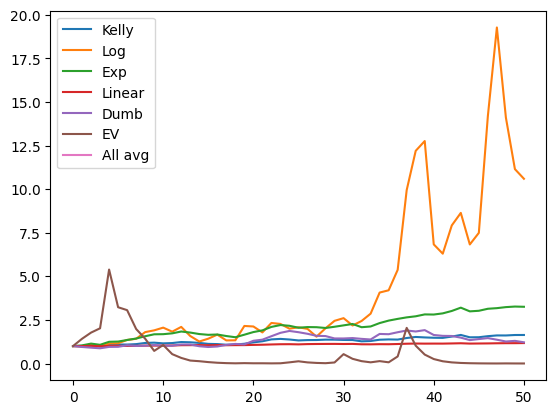

In [91]:
    
result_kelly = []
result_log = []
result_exp = []
result_linear = []
result_dumb = []
result_ev = []
result_all_avg = []

M = 10  # Nombre de matchs
N = 3   # Nombre de résultats possibles par match (ex: victoire, nul, défaite)
T = 50 # Nombre de pas
H = 30 # Nombre de simulations
B = 1 # Bankroll initiale

BIAS_BOOKMAKER = 0 # Biais de la distribution des probabilités du bookmaker
BIAS_PLAYER = 0      # Biais de la distribution des probabilités du joueur
STD_BOOKMAKER = 0.1  # Ecart-type de la distribution des cotes du bookmaker
STD_PLAYER = 0.2      # Ecart-type de la distribution des cotes du joueur
MARGIN_BOOKMAKER = 0.1  # Marge du bookmaker
MIN_PROB = 0.05  # Probabilité minimale d'un résultat
MAX_PROB = 0.95  # Probabilité maximale d'un résultat


for h in tqdm.tqdm(range(H), desc='Simulation'):

    B_kelly = B
    B_log = B
    B_exp = B
    B_linar = B
    B_dumb = B
    B_ev = B
    B_all_avg = B
    B_list_kelly = [B]
    B_list_log = [B]
    B_list_exp = [B]
    B_list_linear = [B]
    B_list_dum = [B]
    B_list_ev = [B]
    B_list_all_avg = [B]

    for t in range(T):
        print(f"Simulation {h}/{H}, step {t}/{T}")
        r, o, t = simulate_prob(M, N, BIAS_BOOKMAKER, BIAS_PLAYER, STD_BOOKMAKER, STD_PLAYER, MARGIN_BOOKMAKER, MIN_PROB, MAX_PROB)
        x = [np.random.choice(N, p=r[i]) for i in range(M)]

        # Kelly criteria
        #print(f"Kelly criteria")
        f = 1/2 * resolve_fik(o, t, lambda  f, o, t : player_utility_kelly_criteria(f, o, t, B=B_kelly), method='trust-constr')
        g = sum(f[k, i] * (o[k, i] * (x[k] == i) - 1)  for k in range(M) for i in range(N))
        B_kelly += B_kelly * g
        #E = player_gain_expected_value_numpy(f, o, r)
        ##print(f'B = {B:.3f}, g = {g:.3f}, r = {r}, b = {1/o}, t = {t}, o = {o}, f = {f}, x = {x}, E = {E:.3f}')
        B_list_kelly.append(B_kelly)

        # Log utility
        #print(f"Log utility")
        f = 1/2 * resolve_fik(o, t, lambda  f, o, t : - player_expected_utility_log(f, o, t, B=B_log), method='trust-constr')
        f = np.clip(f, 0, 1)
        g = sum(f[k, i] * (o[k, i] * (x[k] == i) - 1)  for k in range(M) for i in range(N))
        B_log += B_log * g
        #E = player_gain_expected_value_numpy(f, o, r)
        ##print(f'B = {B:.3f}, g = {g:.3f}, r = {r}, b = {1/o}, t = {t}, o = {o}, f = {f}, x = {x}, E = {E:.3f}')
        B_list_log.append(B_log)


        # Exp utility
        #print(f"Exp utility")
        f = 1/2 * resolve_fik(o, t, lambda  f, o, t : - player_expected_utility_exp_ce(f, o, t, B=B_exp), method='trust-constr')
        g = sum(f[k, i] * (o[k, i] * (x[k] == i) - 1)  for k in range(M) for i in range(N))
        B_exp += B_exp * g
        #E = player_gain_expected_value_numpy(f, o, r)
        #print(f'B = {B:.3f}, g = {g:.3f}, r = {r}, b = {1/o}, t = {t}, o = {o}, f = {f}, x = {x}, E = {E:.3f}')
        B_list_exp.append(B_exp)

        # Linear utility
        #print(f"Linear utility")
        f = 1/2 * resolve_fik(o, t, lambda  f, o, t : player_utility_linear(f, o, t, B=B_linar, l=10), method='trust-constr')
        g = sum(f[k, i] * (o[k, i] * (x[k] == i) - 1)  for k in range(M) for i in range(N))
        B_linar += B_linar * g
        #E = player_gain_expected_value_numpy(f, o, r)
        #print(f'B = {B:.3f}, g = {g:.3f}, r = {r}, b = {1/o}, t = {t}, o = {o}, f = {f}, x = {x}, E = {E:.3f}')
        B_list_linear.append(B_linar)

        # expected value
        #print(f"Expected value")
        f = 1/2 * resolve_fik(o, t, lambda  f, o, t : player_utility_linear(f, o, t, B=B_linar, l=0), method='trust-constr')
        g = sum(f[k, i] * (o[k, i] * (x[k] == i) - 1)  for k in range(M) for i in range(N))
        B_ev += B_ev * g
        #E = player_gain_expected_value_numpy(f, o, r)
        #print(f'B = {B:.3f}, g = {g:.3f}, r = {r}, b = {1/o}, t = {t}, o = {o}, f = {f}, x = {x}, E = {E:.3f}')
        B_list_ev.append(B_ev)

        # biggest proba
        f = np.zeros((M, N))
        for k in range(M):
            f[k, np.argmax(o[k])] = 1
        f = 1/5 * f / np.sum(f)
        g = sum(f[k, i] * (o[k, i] * (x[k] == i) - 1)  for k in range(M) for i in range(N))
        B_dumb += B_dumb * g
        #E = player_gain_expected_value_numpy(f, o, r)
        #print(f'B = {B:.3f}, g = {g:.3f}, r = {r}, b = {1/o}, t = {t}, o = {o}, f = {f}, x = {x}, E = {E:.3f}')
        B_list_dum.append(B_dumb)

        # all average
        f = 1/2 * np.ones((M, N)) / (N*M)
        g = sum(f[k, i] * (o[k, i] * (x[k] == i) - 1)  for k in range(M) for i in range(N))
        B_all_avg += B_all_avg * g
        #E = player_gain_expected_value_numpy(f, o, r)
        #print(f'B = {B:.3f}, g = {g:.3f}, r = {r}, b = {1/o}, t = {t}, o = {o}, f = {f}, x = {x}, E = {E:.3f}')
        B_list_all_avg.append(B_all_avg)


    # plt.plot(B_list_kelly, label='Kelly')
    # plt.plot(B_list_linear, label='Linear')
    # plt.plot(B_list_dum, label='Dumb')
    # plt.legend()

    result_kelly.append(B_list_kelly)
    result_linear.append(B_list_linear)
    result_log.append(B_list_log)
    result_exp.append(B_list_exp)
    result_ev.append(B_list_ev)
    result_dumb.append(B_list_dum)
    result_all_avg.append(B_all_avg)

plt.plot(np.mean(result_kelly, axis=0), label='Kelly')
plt.plot(np.mean(result_log, axis=0), label='Log')
plt.plot(np.mean(result_exp, axis=0), label='Exp')
plt.plot(np.mean(result_linear, axis=0), label='Linear')
plt.plot(np.mean(result_dumb, axis=0), label='Dumb')
plt.plot(np.mean(result_ev, axis=0), label='EV')
plt.plot(np.mean(result_all_avg, axis=0), label='All avg')
plt.legend()



In [92]:
import pickle
with open('result_kelly_2.pkl', 'wb') as f:
    pickle.dump(result_kelly, f)
with open('result_log_2.pkl', 'wb') as f:
    pickle.dump(result_log, f)
with open('result_exp_2.pkl', 'wb') as f:
    pickle.dump(result_exp, f)
with open('result_linear_2.pkl', 'wb') as f:
    pickle.dump(result_linear, f)
with open('result_dumb_2.pkl', 'wb') as f:
    pickle.dump(result_dumb, f)
with open('result_ev_2.pkl', 'wb') as f:
    pickle.dump(result_ev, f)
with open('result_all_avg_2.pkl', 'wb') as f:
    pickle.dump(result_all_avg, f)



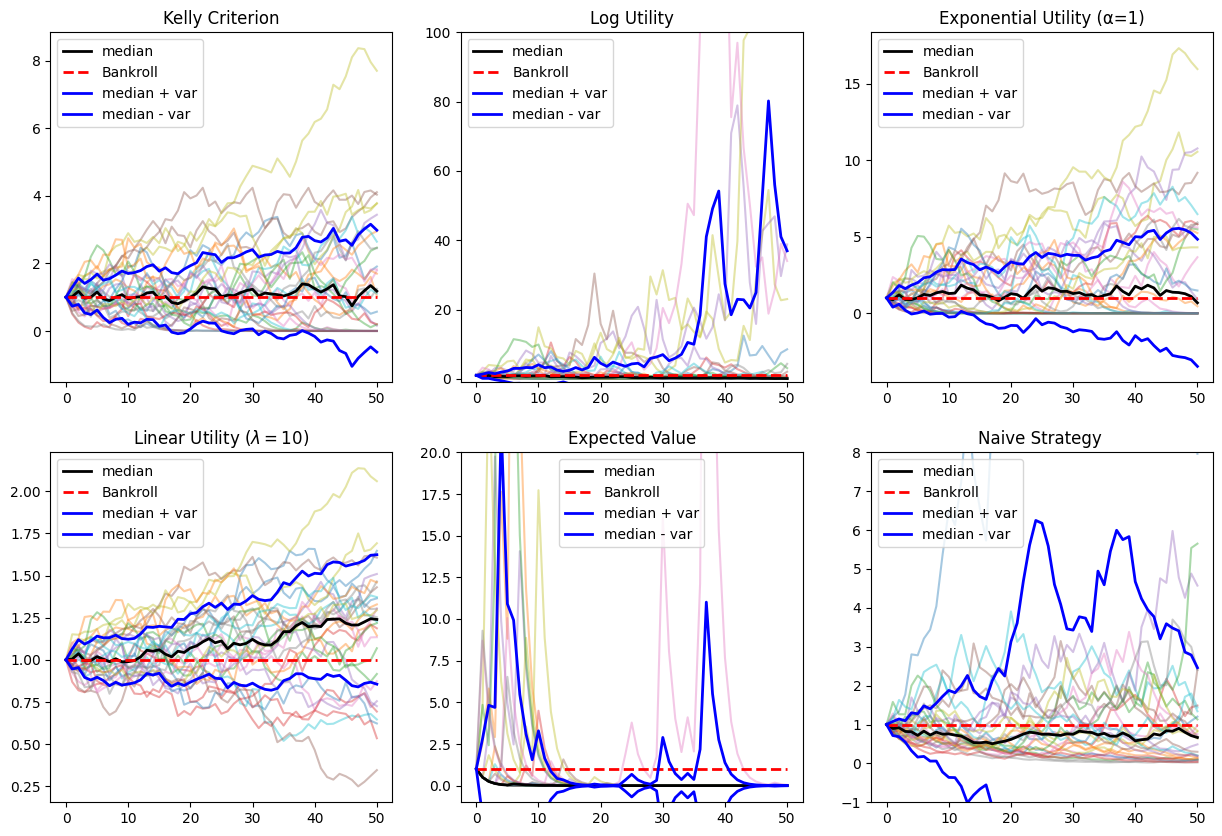

In [93]:
result = result_kelly
result = result_linear
result = result_log
result = result_exp
result = result_ev
result = result_dumb
results = [result_kelly, result_log, result_exp, result_linear, result_ev, result_dumb]
results_name = ['Kelly Criterion', 'Log Utility', 'Exponential Utility (\u03B1=1)', 'Linear Utility ($\lambda=10$)', 'Expected Value', 'Naive Strategy ']

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.flatten()
for i, (result, name) in enumerate(zip(results, results_name)):
    for sim in result:
        ax[i].plot(sim, alpha=0.4)

    ax[i].plot(np.median(result, axis=0), label='median', color='black', linewidth=2)
    ax[i].plot(np.ones(T+1), label='Bankroll', color='red', linewidth=2, linestyle='--')
    ax[i].plot(np.median(result, axis=0) + np.sqrt(np.var(result, axis=0)), label='median + var', color='blue', linewidth=2)
    ax[i].plot(np.median(result, axis=0) - np.sqrt(np.var(result, axis=0)), label='median - var', color='blue', linewidth=2)
    if i == 1:
        ax[i].set_ylim([-1, 100])  # Fixes the y-axis limits
    if i == 4:
        ax[i].set_ylim([-1, 20])  # Fixes the y-axis limits
    if i == 5:
        ax[i].set_ylim([-1, 8])  # Fixes the y-axis limits
    ax[i].legend()
    ax[i].set_title(name)

plt.show()


# for result, name in zip(results, results_name):
#     for sim in result:
#         plt.plot(sim)

#     plt.plot(np.mean(result, axis=0), label=name, color='black', linewidth=2)
#     plt.plot(np.ones(T+1), label='Bankroll', color='red', linewidth=2)
#     plt.plot(np.median(result, axis=0) + np.sqrt(np.var(result, axis=0)), label='Linear + var', color='blue', linewidth=2)
#     plt.plot(np.median(result, axis=0) - np.sqrt(np.var(result, axis=0)), label='Linear + var', color='blue', linewidth=2)
#     plt.plot()
#     plt.legend()
#     plt.title(f'{name}, H={H}, T={T}')
#     plt.show()


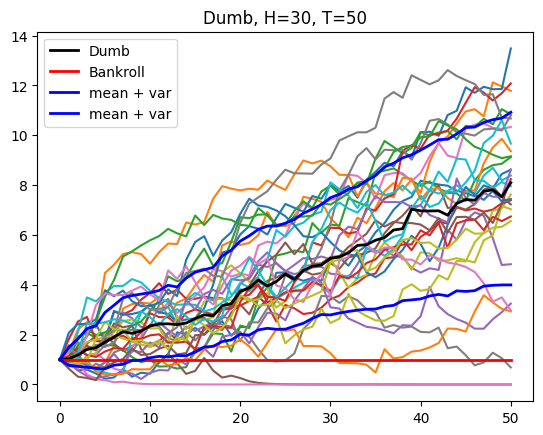

In [57]:
results = [result_kelly, result_linear, result_log, result_exp, result_ev, result_dumb, result_all_avg]
result = result_exp
for sim in result:
    plt.plot(sim)

plt.plot(np.median(result, axis=0), label=name, color='black', linewidth=2)
plt.plot(np.ones(T+1), label='Bankroll', color='red', linewidth=2)
plt.plot(np.mean(result, axis=0) + np.sqrt(np.var(result, axis=0)), label='mean + var', color='blue', linewidth=2)
plt.plot(np.mean(result, axis=0) - np.sqrt(np.var(result, axis=0)), label='mean + var', color='blue', linewidth=2)
plt.plot()
# plt.ylim(0, 100)
plt.legend()
plt.title(f'{name}, H={H}, T={T}')
plt.show()

## Metrics

### 1. Calculate Final Bankroll Statistics

Mean and Standard Deviation of Final Bankrolls:

For each strategy, calculate the mean and standard deviation of the final bankrolls across all simulations. This will give you an idea of the average performance and variability of each strategy.

In [54]:
import numpy as np

strategies = {
    'Kelly': result_kelly,
    'Log': result_log,
    'Exp': result_exp,
    'Linear': result_linear,
    'Expected Value': result_ev,
    'Dumb': result_dumb,
}

final_bankrolls = {}
for name, results in strategies.items():
    final_bankrolls[name] = [B_list[-1] for B_list in results]
    mean_final = np.mean(final_bankrolls[name])
    std_final = np.std(final_bankrolls[name])
    median_final = np.median(final_bankrolls[name])
    max_final = np.max(final_bankrolls[name])
    min_final = np.min(final_bankrolls[name])
    print(f"{name} Strategy - Mean Final Bankroll: {mean_final:.2f}, Std Dev: {std_final:.2f}, Median: {median_final:.2f}, Max: {max_final:.2f}, Min: {min_final:.2f}")


Kelly Strategy - Mean Final Bankroll: 4.48, Std Dev: 1.67, Median: 4.77, Max: 7.54, Min: 0.54
Log Strategy - Mean Final Bankroll: 270.85, Std Dev: 983.14, Median: 15.39, Max: 5414.01, Min: 0.19
Exp Strategy - Mean Final Bankroll: 7.46, Std Dev: 3.46, Median: 8.10, Max: 13.48, Min: 0.00
Linear Strategy - Mean Final Bankroll: 1.35, Std Dev: 0.16, Median: 1.37, Max: 1.61, Min: 1.03
Expected Value Strategy - Mean Final Bankroll: 0.00, Std Dev: 0.00, Median: 0.00, Max: 0.01, Min: 0.00
Dumb Strategy - Mean Final Bankroll: 1.20, Std Dev: 3.20, Median: 0.47, Max: 18.19, Min: 0.06


### 2. Compute Growth Rates
Average Growth Rate per Time Step:

Calculate the geometric mean of the growth rates to understand how the bankroll grows over time for each strategy.

In [30]:
def geometric_mean_growth(B_lists):
    growth_rates = []
    for B_list in B_lists:
        rates = np.diff(np.log(B_list))
        growth_rates.append(np.mean(rates))
    return np.exp(np.mean(growth_rates)) - 1

for name, results in strategies.items():
    avg_growth = geometric_mean_growth(results)
    print(f"{name} Strategy - Average Growth Rate per Step: {avg_growth:.4f}")


Kelly Strategy - Average Growth Rate per Step: 0.0282
Log Strategy - Average Growth Rate per Step: 0.0554
Exp Strategy - Average Growth Rate per Step: 0.0255
Linear Strategy - Average Growth Rate per Step: 0.0059
Expected Value Strategy - Average Growth Rate per Step: -0.2983
Dumb Strategy - Average Growth Rate per Step: -0.0155


### 3. Plot Bankroll Over Time with Confidence Intervals
Mean and Confidence Intervals:

Plot the mean bankroll over time with confidence intervals to visualize the performance and variability.

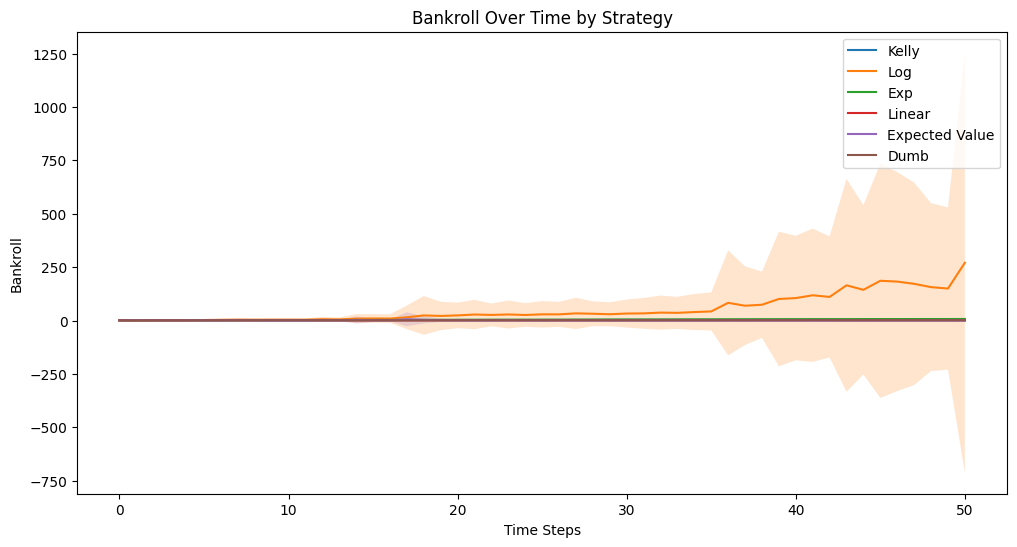

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for name, results in strategies.items():
    results_array = np.array(results)
    mean_bankroll = np.mean(results_array, axis=0)
    std_bankroll = np.std(results_array, axis=0)
    plt.plot(mean_bankroll, label=name)
    plt.fill_between(range(len(mean_bankroll)),
                     mean_bankroll - std_bankroll,
                     mean_bankroll + std_bankroll, alpha=0.2)

plt.xlabel('Time Steps')
plt.ylabel('Bankroll')
plt.title('Bankroll Over Time by Strategy')
plt.legend()
plt.show()


### 4. Compute Risk-Adjusted Returns
Sharpe Ratio:

Calculate the Sharpe Ratio for each strategy to assess the return per unit of risk.

In [32]:
def sharpe_ratio(B_lists, risk_free_rate=0):
    sharpe_ratios = []
    for B_list in B_lists:
        returns = np.diff(B_list) / B_list[:-1]
        excess_returns = returns - risk_free_rate
        ratio = np.mean(excess_returns) / np.std(excess_returns)
        sharpe_ratios.append(ratio)
    return np.mean(sharpe_ratios)

for name, results in strategies.items():
    sr = sharpe_ratio(results)
    print(f"{name} Strategy - Sharpe Ratio: {sr:.2f}")


Kelly Strategy - Sharpe Ratio: 0.30
Log Strategy - Sharpe Ratio: 0.29
Exp Strategy - Sharpe Ratio: 0.25
Linear Strategy - Sharpe Ratio: 0.30
Expected Value Strategy - Sharpe Ratio: 0.14
Dumb Strategy - Sharpe Ratio: 0.01


### 5. Analyze Probability of Ruin (going under 0.1)
Probability of Bankroll Reaching Zero:

Calculate the proportion of simulations where the bankroll falls to zero or below.

In [43]:

espsilon = 0.1
def probability_of_ruin(B_lists):

    ruin_count = sum(1 for B_list in B_lists if any(B <= espsilon for B in B_list))
    return ruin_count / len(B_lists)

for name, results in strategies.items():
    prob_ruin = probability_of_ruin(results)
    print(f"{name} Strategy - Probability of going under {espsilon}: {prob_ruin*100:.2f}%")


Kelly Strategy - Probability of going under 0.1: 0.00%
Log Strategy - Probability of going under 0.1: 3.33%
Exp Strategy - Probability of going under 0.1: 6.67%
Linear Strategy - Probability of going under 0.1: 0.00%
Expected Value Strategy - Probability of going under 0.1: 100.00%
Dumb Strategy - Probability of going under 0.1: 20.00%


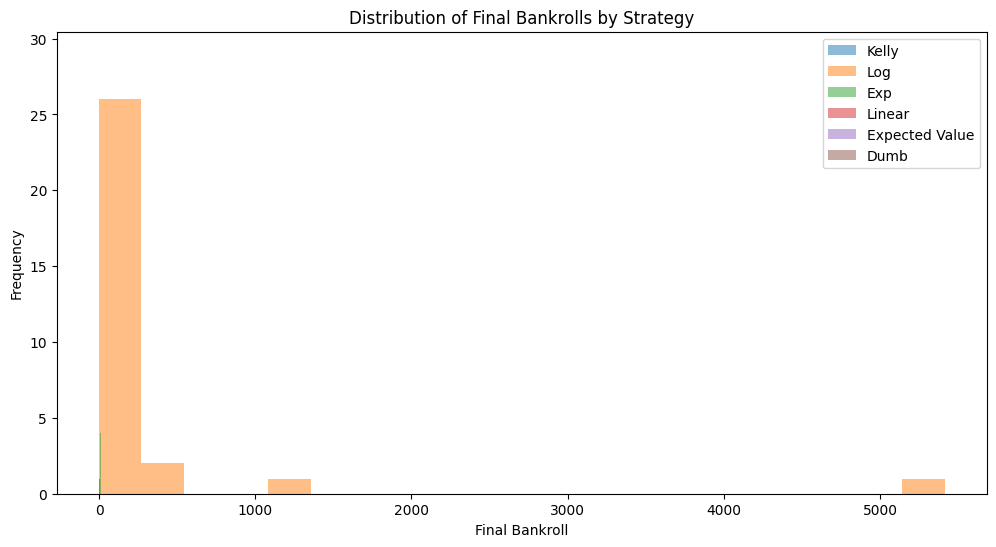

In [45]:
plt.figure(figsize=(12, 6))

for name, results in strategies.items():
    plt.hist(final_bankrolls[name], bins=20, alpha=0.5, label=name)

plt.xlabel('Final Bankroll')
plt.ylabel('Frequency')
plt.title('Distribution of Final Bankrolls by Strategy')
plt.legend()
plt.show()


### 7. Statistical Significance Testing
ANOVA Test:

Perform an ANOVA test to determine if there are statistically significant differences between strategies.

In [46]:
from scipy.stats import f_oneway

final_values = [final_bankrolls[name] for name in strategies.keys()]
f_stat, p_value = f_oneway(*final_values)
print(f"ANOVA Test - F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")


ANOVA Test - F-statistic: 2.16, p-value: 0.0612


M = 10

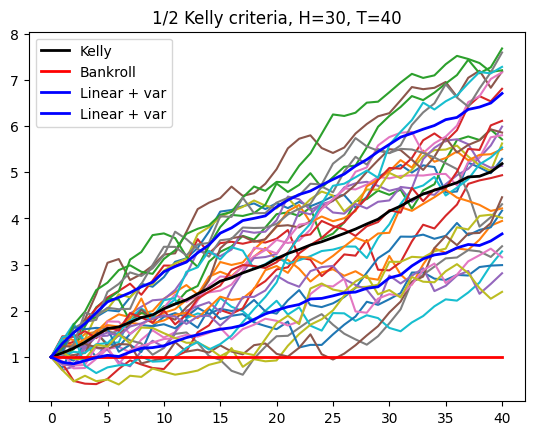

In [190]:
for sim in result_kelly:
    plt.plot(sim)

plt.plot(np.mean(result_kelly, axis=0), label='Kelly', color='black', linewidth=2)
plt.plot(np.ones(T+1), label='Bankroll', color='red', linewidth=2)
plt.plot(np.mean(result_kelly, axis=0) + np.sqrt(np.var(result_kelly, axis=0)), label='Linear + var', color='blue', linewidth=2)
plt.plot(np.mean(result_kelly, axis=0) - np.sqrt(np.var(result_kelly, axis=0)), label='Linear + var', color='blue', linewidth=2)
plt.plot()
plt.legend()
plt.title(f'1/2 Kelly criteria, H={H}, T={T}')
plt.show()


<Axes: ylabel='Count'>

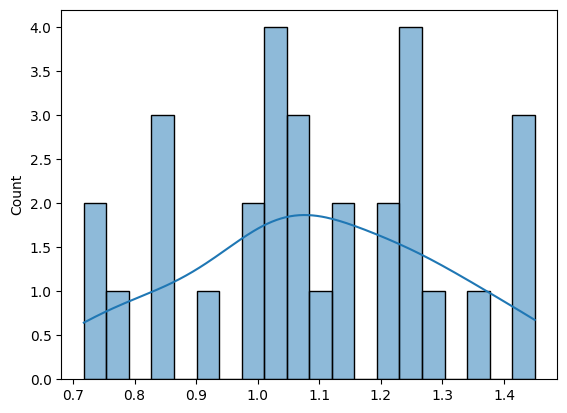

In [209]:
import seaborn as sns
sns.histplot([result_kelly[k][1] for k in range(H)], bins=20, kde=True)

<Axes: ylabel='Count'>

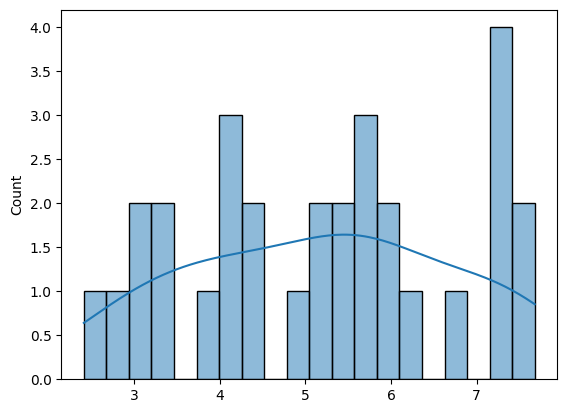

In [203]:
import seaborn as sns
sns.histplot([result_kelly[k][-1] for k in range(H)], bins=20, kde=True)

In [191]:
[result_kelly[k][-1] for k in range(H)]

[5.289372800923383,
 3.9462833613169863,
 5.711402887287294,
 4.935271164386308,
 5.987343764373311,
 7.178485840156292,
 5.801202718867998,
 3.3979163701526414,
 5.6222215700657525,
 3.28713627888462,
 4.16959210153067,
 5.496615422266104,
 7.677639097707732,
 6.805417336912975,
 5.139012564565831,
 5.858210142782816,
 7.160119811234751,
 4.307374832385951,
 4.014082514158091,
 5.536302811094495,
 2.9899787707166414,
 4.21683628723513,
 7.20582412356795,
 6.110968527172587,
 2.8134524255336886,
 4.458727894448023,
 3.158782920305209,
 7.591142351568197,
 2.41117733950737,
 7.279602879452999]

In [164]:
V = np.var([result_kelly[k][-1] for k in range(H)])
E = np.mean([result_kelly[k][-1] for k in range(H)])
print(f'Kelly: E = {E:.3f}, V = {V:.3f}')

Kelly: E = 5.185, V = 2.309


In [166]:
V = np.var([result_kelly[k][1] for k in range(H)])
E = np.mean([result_kelly[k][1] for k in range(H)])
print(f'Kelly: E = {E:.3f}, V = {V:.3f}')

Kelly: E = 1.090, V = 0.041


In [167]:
np.mean(result_kelly, axis=0)

array([1.  , 1.09, 1.19, 1.32, 1.47, 1.62, 1.65, 1.75, 1.86, 1.91, 2.04,
       2.15, 2.24, 2.37, 2.49, 2.64, 2.72, 2.82, 2.91, 2.99, 3.13, 3.24,
       3.33, 3.43, 3.5 , 3.58, 3.68, 3.77, 3.88, 3.98, 4.16, 4.27, 4.41,
       4.53, 4.61, 4.69, 4.77, 4.9 , 4.91, 5.  , 5.19])

In [168]:
np.var(result_kelly, axis=0)

array([0.  , 0.04, 0.11, 0.16, 0.24, 0.33, 0.41, 0.41, 0.44, 0.5 , 0.64,
       0.66, 0.67, 0.79, 0.88, 1.08, 1.17, 1.28, 1.2 , 1.12, 1.25, 1.33,
       1.42, 1.36, 1.5 , 1.59, 1.65, 1.86, 1.94, 2.14, 2.08, 2.22, 2.06,
       1.97, 1.96, 2.09, 1.99, 2.13, 2.24, 2.23, 2.31])

In [171]:
np.mean(result_kelly, axis=0) + np.var(result_kelly, axis=0)

array([1.  , 1.13, 1.31, 1.48, 1.71, 1.95, 2.06, 2.16, 2.3 , 2.41, 2.69,
       2.81, 2.91, 3.16, 3.37, 3.72, 3.88, 4.11, 4.1 , 4.12, 4.38, 4.57,
       4.74, 4.79, 5.  , 5.17, 5.33, 5.63, 5.82, 6.12, 6.24, 6.49, 6.46,
       6.5 , 6.57, 6.78, 6.77, 7.03, 7.16, 7.23, 7.49])

M = 5

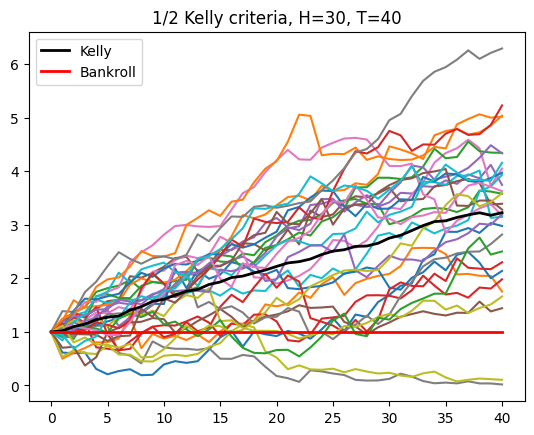

In [125]:
for sim in result_kelly:
    plt.plot(sim)

plt.plot(np.mean(result_kelly, axis=0), label='Kelly', color='black', linewidth=2)
plt.plot(np.ones(T+1), label='Bankroll', color='red', linewidth=2)
plt.legend()
plt.title(f'1/2 Kelly criteria, H={H}, T={T}')
plt.show()


M = 1

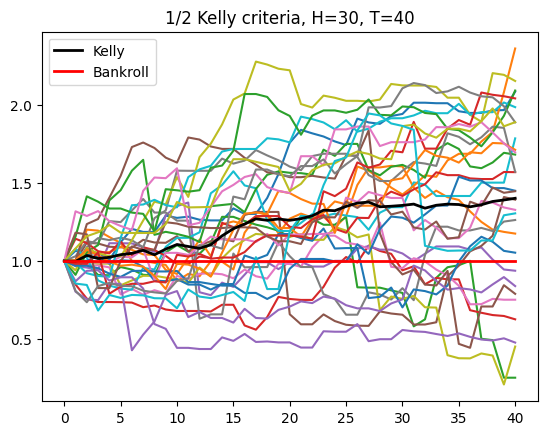

In [131]:
for sim in result_kelly:
    plt.plot(sim)

plt.plot(np.mean(result_kelly, axis=0), label='Kelly', color='black', linewidth=2)
plt.plot(np.ones(T+1), label='Bankroll', color='red', linewidth=2)
plt.legend()
plt.title(f'1/2 Kelly criteria, H={H}, T={T}')
plt.show()


M = 10

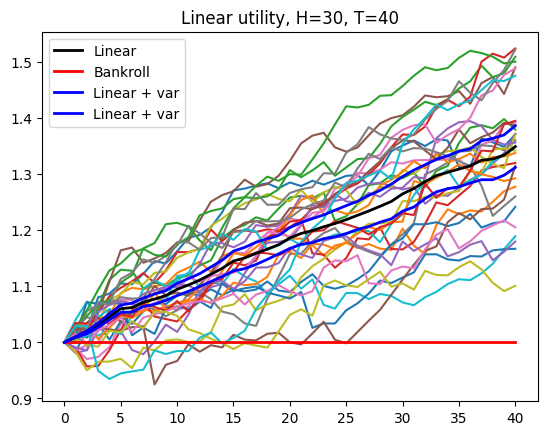

In [212]:
for sim in result_linear:
    plt.plot(sim)

plt.plot(np.mean(result_linear, axis=0), label='Linear', color='black', linewidth=2)
plt.plot(np.ones(T+1), label='Bankroll', color='red', linewidth=2)
plt.plot(np.mean(result_linear, axis=0) + 3 * np.var(result_linear, axis=0), label='Linear + var', color='blue', linewidth=2)
plt.plot(np.mean(result_linear, axis=0) - 3 * np.var(result_linear, axis=0), label='Linear + var', color='blue', linewidth=2)

plt.legend()
plt.title(f'Linear utility, H={H}, T={T}')
plt.show()

<Axes: ylabel='Count'>

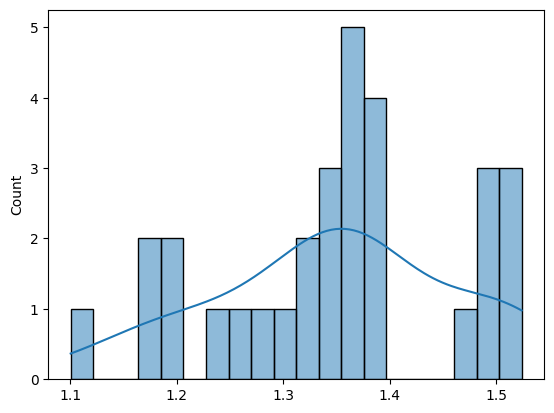

In [211]:
import seaborn as sns
sns.histplot([result_linear[k][-1] for k in range(H)], bins=20, kde=True)



In [181]:
var = np.var([result_linear[k][-1] for k in range(H)])
mean = np.mean([result_linear[k][-1] for k in range(H)])

In [187]:
print(f'Linear: mean = {mean:.3f}, var = {var:.3f}')

Linear: mean = 1.349, var = 0.012


In [183]:
[result_linear[k][-1] for k in range(H)] 

[1.3708317281325595,
 1.2773799029112711,
 1.3791897053818494,
 1.3196511934559716,
 1.3717674743166663,
 1.4899819250020794,
 1.391706068793862,
 1.3604023161229086,
 1.3701248489486284,
 1.1890990806963238,
 1.2414385762247744,
 1.337334937284742,
 1.5087935121052127,
 1.5236236546128483,
 1.3561370441809208,
 1.3864928354050619,
 1.4882760170251395,
 1.2599777496883344,
 1.3415034246651958,
 1.3492042335152263,
 1.1667108585177983,
 1.2923269481398798,
 1.5002019129988522,
 1.3945168661368896,
 1.1796718712218028,
 1.3143774909796169,
 1.2048571616249362,
 1.5219224199745651,
 1.100626381404494,
 1.4750780767378384]

In [188]:
sum([1 if x > mean -  * var and x < mean + 3 * var else 0 for x in [result_linear[k][-1] for k in range(H)]]) / H

0.36666666666666664

In [176]:
np.var(result_linear, axis=0)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

In [162]:
np.var([result_linear[k][-1] for k in range(H)])

0.012393956048493329

M = 5

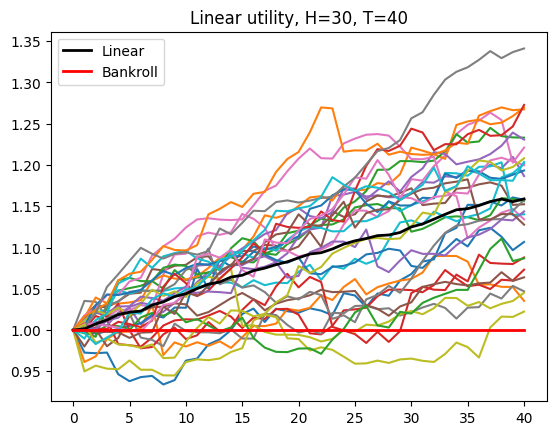

In [126]:
for sim in result_linear:
    plt.plot(sim)

plt.plot(np.mean(result_linear, axis=0), label='Linear', color='black', linewidth=2)
plt.plot(np.ones(T+1), label='Bankroll', color='red', linewidth=2)
plt.legend()
plt.title(f'Linear utility, H={H}, T={T}')
plt.show()

M = 1

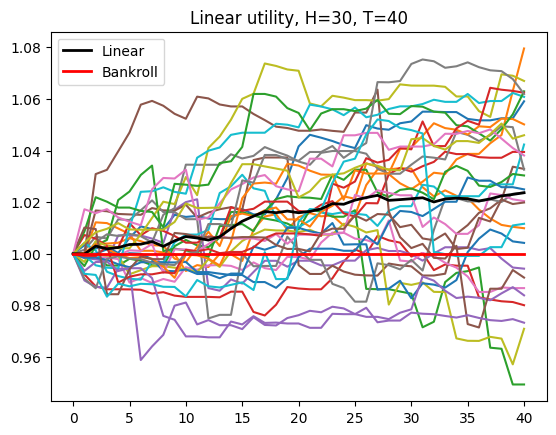

In [132]:
for sim in result_linear:
    plt.plot(sim)

plt.plot(np.mean(result_linear, axis=0), label='Linear', color='black', linewidth=2)
plt.plot(np.ones(T+1), label='Bankroll', color='red', linewidth=2)
plt.legend()
plt.title(f'Linear utility, H={H}, T={T}')
plt.show()

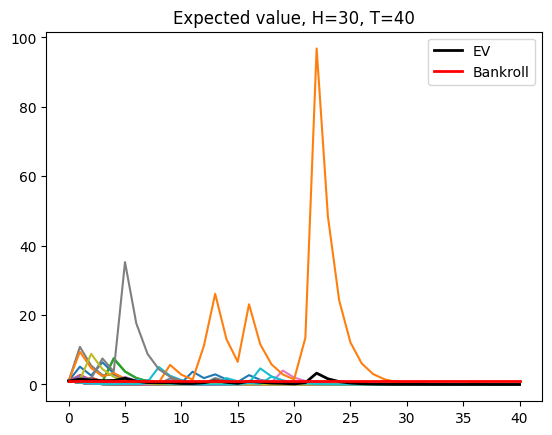

In [127]:
for sim in result_ev:
    plt.plot(sim)

plt.plot(np.mean(result_ev, axis=0), label='EV', color='black', linewidth=2)
plt.plot(np.ones(T+1), label='Bankroll', color='red', linewidth=2)
plt.legend()
plt.title(f'Expected value, H={H}, T={T}')
plt.show()

Text(0.5, 1.0, 'Dumb utility, H=30, T=40')

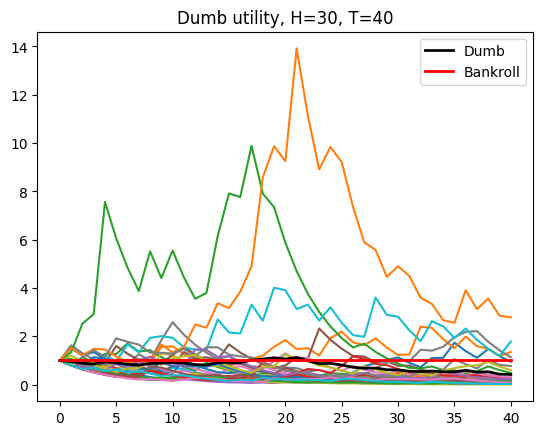

In [128]:
for sim in result_dumb:
    plt.plot(sim)

plt.plot(np.mean(result_dumb, axis=0), label='Dumb', color='black', linewidth=2)
plt.plot(np.ones(T+1), label='Bankroll', color='red', linewidth=2)
plt.legend()
plt.title(f'Dumb utility, H={H}, T={T}')

In [102]:
%%time
for _ in range(10_000):
    simulate_prob(M, N, BIAS_BOOKMAKER, BIAS_PLAYER, STD_BOOKMAKER, STD_PLAYER, MARGIN_BOOKMAKER, MIN_PROB, MAX_PROB)


CPU times: total: 469 ms
Wall time: 476 ms


In [103]:
%%time
for _ in range(10_000):
    x = [np.random.choice(N, p=r[i]) for i in range(M)]

CPU times: total: 672 ms
Wall time: 659 ms


In [106]:
%%time
for _ in range(100):
    f = 1/2 * resolve_fik(o, t, lambda  f, o, t : player_utility_kelly_criteria(f, o, t, B=1))

CPU times: total: 2.48 s
Wall time: 2.56 s


In [97]:
r, o, t = simulate_prob(M, N, BIAS_BOOKMAKER, BIAS_PLAYER, STD_BOOKMAKER, STD_PLAYER, MARGIN_BOOKMAKER, MIN_PROB, MAX_PROB)
f = 1/2 * resolve_fik(o, t, lambda  f, o, t : player_utility_kelly_criteria(f, o, t, B=1))

In [68]:
K = 10_000

In [74]:
%%time
E = 0
for _ in range(K):
    E += player_gain_expected_value(f, o, r)
E /= K
E


CPU times: total: 141 ms
Wall time: 158 ms


0.25687984486351684

In [73]:
%%time
E = 0
for _ in range(K):
    E += player_gain_expected_value_numpy(f, o, r)
E /= K
E

CPU times: total: 125 ms
Wall time: 111 ms


0.25687984486351684

In [86]:
%%time
V = 0
for _ in range(K):
    V += player_gain_variance(f, o, r)
V /= K
V

CPU times: total: 656 ms
Wall time: 661 ms


0.014905168432275644

In [91]:
%%time
V = 0
for _ in range(K):
    V += player_gain_variance_numpy(f, o, r)
V /= K
V

CPU times: total: 828 ms
Wall time: 822 ms


0.014905168432275618

In [9]:
V = player_gain_variance(f, o, r)
V

0.014905168432272799

In [10]:
V = player_gain_variance_numpy(f, o, r)
V

0.014905168432272724

In [33]:
result_kelly

[[1,
  0.9922689069038402,
  0.9652620966895434,
  0.9564592573123967,
  0.9961703228309225,
  1.1553541587195464,
  1.5008277232296372,
  1.6773160614568845,
  1.8187103490756826,
  2.133170907395135,
  2.1834139029117168,
  2.0608554360188016,
  1.691423520967085,
  1.651141201051638,
  1.6109406242218203,
  1.4928628447975476,
  1.5670698553462958,
  1.6110949900915306,
  1.7925516402800912,
  2.022778999748562,
  2.1861797749774277,
  2.1053815539864527,
  2.313276362065813,
  2.325504563875937,
  2.338111973121999,
  2.6451779544626284,
  2.8402624060317097,
  2.572326176028792,
  2.51926293150837,
  2.6654639067673047,
  2.9032023676069763,
  2.8571127573081094,
  3.176048001216973,
  3.0714562105978733,
  2.9794513352309018,
  2.8209165925508444,
  2.837996709402316,
  3.0730878892545546,
  3.1932125603170882,
  3.4088723984850504,
  3.150808488419415,
  3.1671497140982194,
  3.2141479590005124,
  3.1905537937515596,
  3.236302312313136,
  3.517060860819992,
  3.472453088610884,

In [32]:
var_kelly = np.var(result_kelly, axis=0)
var_linear = np.var(result_linear, axis=0)
var_dumb = np.var(result_dumb, axis=0)

print(f'Kelly: {np.mean(var_kelly):.3f}')
print(f'Linear: {np.mean(var_linear):.3f}')
print(f'Dumb: {np.mean(var_dumb):.3f}')


Kelly: 1.656
Linear: 0.200
Dumb: 0.552


In [24]:
print(np.argmax(o, axis=1))
print(o)
f = np.zeros((M, N))
for k in range(M):
    f[k, np.argmax(o[k])] = 1
f = f / np.sum(f)
print(f)

[0 0 0 1 0 2 2 1 1 0 0 2 0 0 0 2 0 0 2 0]
[[ 3.75  2.54  2.36]
 [12.49  1.28  4.51]
 [16.3  10.32  1.06]
 [ 6.7  19.81  1.11]
 [ 3.83  2.46  2.26]
 [ 1.74  2.84  6.65]
 [ 1.65  3.87  4.58]
 [ 2.44  6.18  1.96]
 [ 2.39  5.83  1.82]
 [11.78  1.29  4.31]
 [ 5.21  1.7   3.04]
 [ 2.5   2.05  4.97]
 [ 5.61  1.62  3.34]
 [ 6.03  2.58  1.83]
 [10.82  1.24  4.98]
 [ 1.67  2.18 16.97]
 [22.77  4.78  1.2 ]
 [ 6.02  1.58  2.44]
 [ 1.15  6.83 12.11]
 [18.4   5.31  1.15]]
[[0.05 0.   0.  ]
 [0.05 0.   0.  ]
 [0.05 0.   0.  ]
 [0.   0.05 0.  ]
 [0.05 0.   0.  ]
 [0.   0.   0.05]
 [0.   0.   0.05]
 [0.   0.05 0.  ]
 [0.   0.05 0.  ]
 [0.05 0.   0.  ]
 [0.05 0.   0.  ]
 [0.   0.   0.05]
 [0.05 0.   0.  ]
 [0.05 0.   0.  ]
 [0.05 0.   0.  ]
 [0.   0.   0.05]
 [0.05 0.   0.  ]
 [0.05 0.   0.  ]
 [0.   0.   0.05]
 [0.05 0.   0.  ]]


In [66]:
B

2.9885968373508537e-05

In [23]:
r.shape

(1, 2)

In [28]:
np.random.normal(0, 0.1, r.shape)

array([[-0.18, -0.02]])

In [48]:
0.51*(- 1) + 0.49*(2.34 - 1)

0.14659999999999995

In [5]:
r, o, t = simulate_prob(M, N, STD_BOOKMAKER, STD_PLAYER, MARGIN_BOOKMAKER, MIN_PROB, MAX_PROB)
f = resolve_fik(o, r, player_utility_kelly_criteria)
x = [np.random.choice(N, p=r[i]) for i in range(M)]
g = np.sum([f[k, i] * (o[k, i] - 1) * (x[k] == i) for k in range(M)] for i in range(N))

Répartition optimale de la bankroll:
[[3.64361997e-03 0.00000000e+00 0.00000000e+00]
 [1.09452764e-02 3.44397103e-17 8.82053889e-17]
 [0.00000000e+00 3.27983618e-01 1.29809188e-01]
 [0.00000000e+00 8.45712690e-02 2.14801843e-01]
 [7.85477414e-18 6.18809131e-02 8.84688874e-17]
 [1.26470259e-02 9.59972671e-17 1.37739938e-17]
 [2.38714595e-02 3.48839682e-02 0.00000000e+00]
 [1.09018130e-16 2.55132392e-02 1.80164763e-16]
 [4.72060690e-02 1.26167955e-16 8.36853052e-03]
 [6.04149514e-17 1.38739799e-02 1.28894686e-16]]


C:\Users\jdelavande\AppData\Local\Temp\ipykernel_24516\1049702632.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  g = np.sum([f[k, i] * (o[k, i] - 1) * (x[k] == i) for k in range(M)] for i in range(N))


TypeError: unsupported operand type(s) for +: 'int' and 'list'

In [95]:
f = resolve_fik(o, r, player_utility_kelly_criteria)
print(np.sum(result))
print(f'utility = {-player_utility_kelly_criteria(f, o, r)}')
print(f'expected_value = {player_gain_expected_value(f, o, r)}')
#print(f'variance = {player_gain_variance(result, o, r)}')
print(f'ecart_type = {np.sqrt(player_gain_variance(f, o, r))}')


Répartition optimale de la bankroll:
[[4.73983973e-02 6.22118014e-02 1.03805518e-01]
 [6.63824654e-17 6.38685309e-18 8.22022794e-03]
 [3.51651000e-17 0.00000000e+00 3.71596485e-02]
 [0.00000000e+00 4.33131388e-02 1.64978860e-02]
 [4.14986438e-02 2.52190109e-02 2.93255614e-16]
 [4.79093611e-02 3.06228045e-17 2.28358178e-02]
 [2.48729718e-02 3.68010727e-01 1.22364378e-17]
 [7.89140926e-03 4.17987196e-17 1.64032295e-02]
 [1.48983753e-17 7.46713317e-02 2.17176455e-02]
 [1.46919580e-02 1.29559145e-17 1.56712766e-02]]
1.0000000000000009
utility = 0.19988872725270634
expected_value = 0.32098287782403784
ecart_type = 0.3730392650733456


In [25]:
x = [np.random.choice(N, p=r[i]) for i in range(M)]
x

[0, 2, 0, 1, 2, 1, 1, 0, 1, 1]

In [27]:
for k in range(M):
    match_k = []
    for i in range(N):
        match_k.append((x[k] == i))
    print(f'k = {k} : {match_k}')

k = 0 : [True, False, False]
k = 1 : [False, False, True]
k = 2 : [True, False, False]
k = 3 : [False, True, False]
k = 4 : [False, False, True]
k = 5 : [False, True, False]
k = 6 : [False, True, False]
k = 7 : [True, False, False]
k = 8 : [False, True, False]
k = 9 : [False, True, False]


In [97]:
g = 0
for k in range(M):
    for i in range(N):
        g += f[k, i] * (o[k, i] - 1) * (x[k] == i)

g

0.9174756801979563

In [4]:
np.sum([f[k, i] * (o[k, i] - 1) * (x[k] == i) for k in range(M)] for i in range(N))

C:\Users\jdelavande\AppData\Local\Temp\ipykernel_24516\1317911945.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  np.sum([f[k, i] * (o[k, i] - 1) * (x[k] == i) for k in range(M)] for i in range(N))


NameError: name 'f' is not defined